In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
zomato_data = pd.read_csv('D:\Data Science-Practice\zomato\zomato.csv')
zomato_data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [3]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
#lets look at the columns to see if we can delete any unnecessary columns
zomato_data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
#dropping the unwanted columns
zomato_data.drop(['url','phone', 'dish_liked' ],axis = 1, inplace = True)


In [6]:
#changing the column names
zomato_data.rename(columns= {'approx_cost(for two people)' : 'cost','listed_in(type)' : 'type',
                             'listed_in(city)' : 'city'}, inplace = True)
zomato_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [7]:
#removing the duplicates if any
zomato_data.duplicated().sum()
zomato_data.drop_duplicates(inplace = True)

In [8]:
#checking for null values
zomato_data.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate            7767
votes              0
location          21
rest_type        227
cuisines          45
cost             345
reviews_list       0
menu_item          0
type               0
city               0
dtype: int64

In [9]:
#as the data is huge, we can drop all the null values
zomato_data.dropna(how = 'any', inplace = True)
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43499 non-null  object
 1   name          43499 non-null  object
 2   online_order  43499 non-null  object
 3   book_table    43499 non-null  object
 4   rate          43499 non-null  object
 5   votes         43499 non-null  int64 
 6   location      43499 non-null  object
 7   rest_type     43499 non-null  object
 8   cuisines      43499 non-null  object
 9   cost          43499 non-null  object
 10  reviews_list  43499 non-null  object
 11  menu_item     43499 non-null  object
 12  type          43499 non-null  object
 13  city          43499 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [10]:
#converting cost feature to float value
zomato_data['cost'] = zomato_data['cost'].apply(lambda x: x.replace(',', '.'))
zomato_data['cost'] = zomato_data['cost'].astype(float)
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [11]:
zomato_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
zomato_data['rate'] = zomato_data['rate'].apply(lambda x: x.replace('/5', ''))
zomato_data['rate'].unique()
#rate column contains '-' and NEW as the value which needs to be corrected

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [13]:
#count the number of 
zomato_data.pivot_table(index = ['rate'], aggfunc ='size').tail(2)


rate
4.9       30
NEW     2197
dtype: int64

In [14]:
zomato_data_org = zomato_data

In [23]:
zomato_data.drop(zomato_data[zomato_data['rate'] == 'NEW' ].index, inplace = True)
#zomato_data.pivot_table(index = ['rate'], aggfunc ='size').tail(2)

In [24]:
zomato_data.pivot_table(index = ['rate'], aggfunc ='size').tail(2)

rate
4.9     25
4.9     30
dtype: int64

In [28]:
zomato_data.drop(zomato_data[zomato_data['rate'] == '-' ].index, inplace = True)
zomato_data.pivot_table(index = ['rate'], aggfunc ='size').head(2)

rate
1.8     2
1.8     3
dtype: int64

In [29]:
zomato_data.pivot_table(index = ['rate'], aggfunc ='size').head(2)

rate
1.8     2
1.8     3
dtype: int64

In [74]:
zomato_data['rate'].astype(float).unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [31]:
zomato_data['city'].unique()
#zomato_data['city'].nunique()


array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [32]:
zomato_data.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


Text(0.5, 1.0, 'Restaurents delivering food online or not')

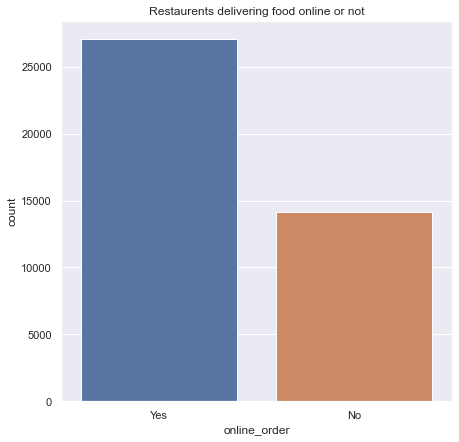

In [33]:
#restaurents taking online order or not
sns.set_theme(style= 'darkgrid')
sns.countplot(x = 'online_order', data = zomato_data)
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.title('Restaurents delivering food online or not')

Text(0.5, 1.0, 'Restaurents allowing table bookings online')

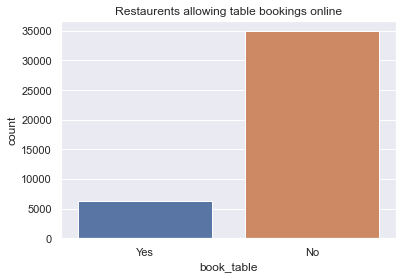

In [34]:
#restaurenets offering table booking or not
sns.countplot(x = 'book_table', data = zomato_data)
fig.set_size_inches(7,7)
plt.title('Restaurents allowing table bookings online')

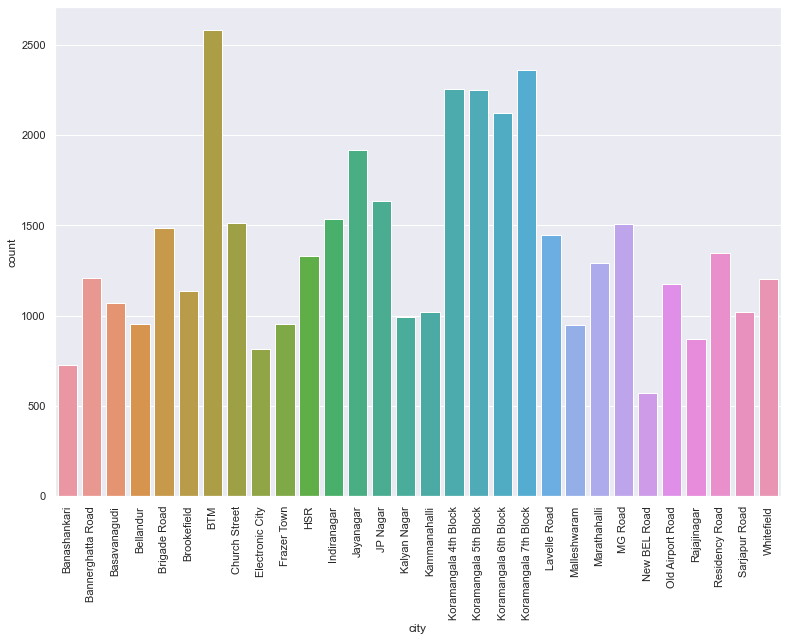

In [35]:
#plotting number of restaurents by city
sns.countplot(x = 'city', data = zomato_data)
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(13,9)

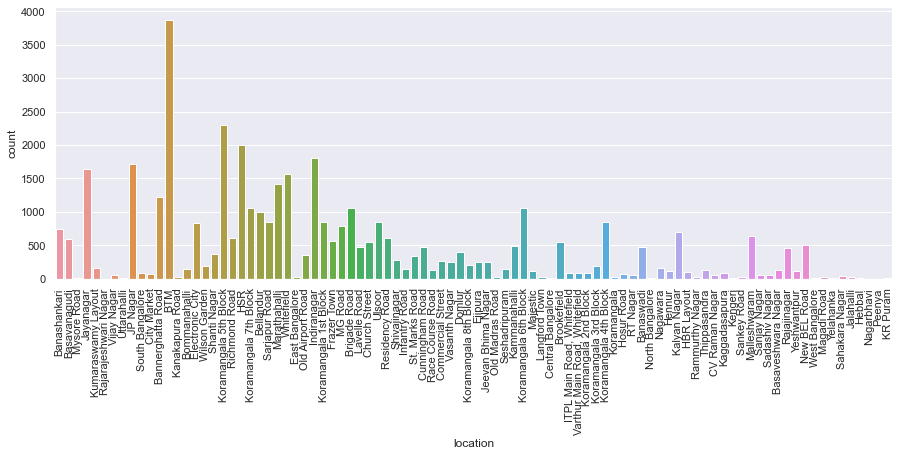

In [57]:
sns.countplot(x = 'location', data = zomato_data)
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(15,5)

Text(0.5, 1.0, 'Maximum number of restaurents by location')

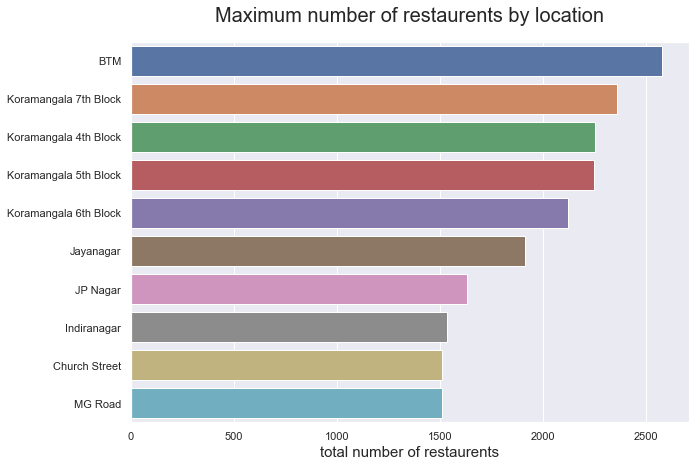

In [36]:
#maximim number of restaurenets by location
plt.figure(figsize = (10,7))
max_rest = zomato_data['city'].value_counts()[:10]
sns.barplot(x = max_rest, y = max_rest.index )
plt.xlabel('total number of restaurents', size = 15)
plt.title('Maximum number of restaurents by location', size = 20, pad = 20)


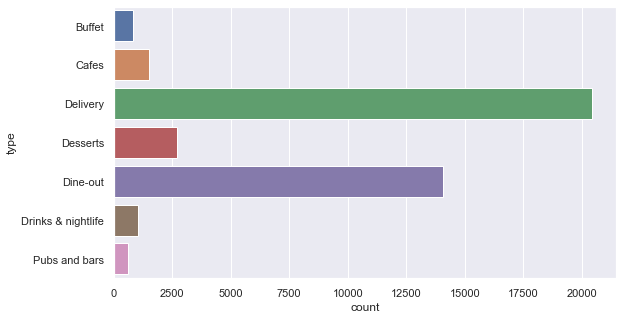

In [54]:
#types of service
sns.countplot(y = 'type', data = zomato_data)
plt.xticks(rotation = 0 )
fig = plt.gcf()
fig.set_size_inches(9,5)

Text(0.5, 0, 'Number of outlets')

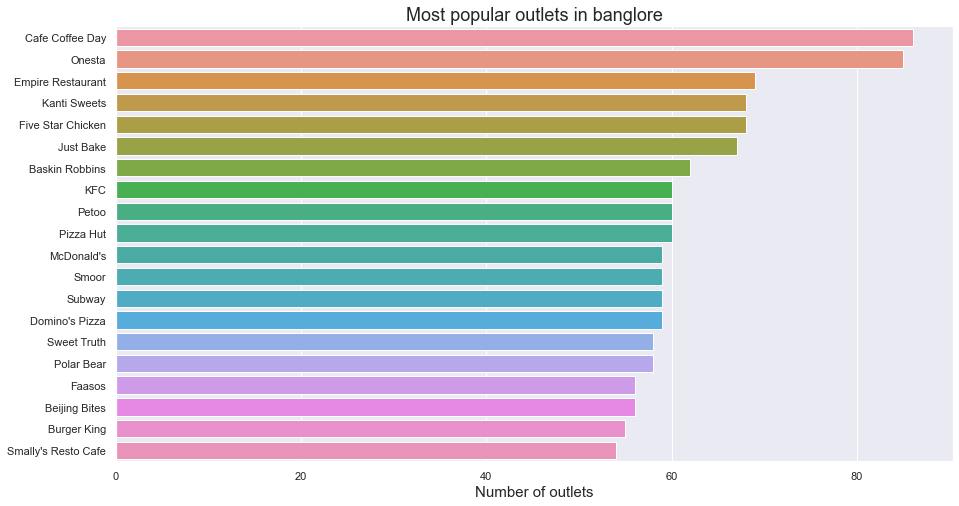

In [62]:
#most popular outlet in banglore
plt.figure(figsize = (15,8))
outlet = zomato_data['name'].value_counts()[:20]
sns.barplot(x = outlet, y = outlet.index, data = zomato_data)
plt.title('Most popular outlets in banglore', size = 18)
plt.xlabel('Number of outlets', size = 15)

Text(0.5, 0, 'Number of restaurents')

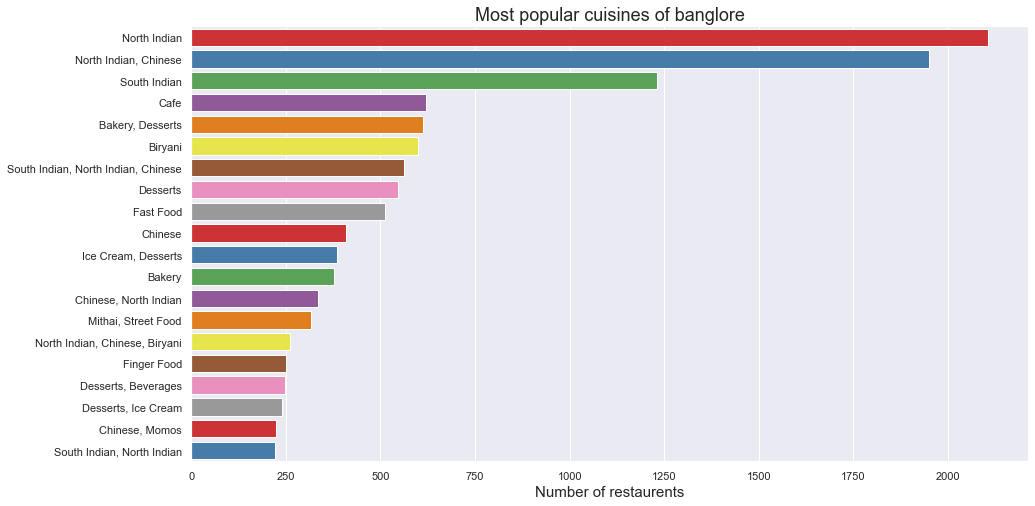

In [60]:
#most popular cuisines in banglore
plt.figure(figsize = (15,8))
cuisines = zomato_data['cuisines'].value_counts()[:20]
sns.barplot(x = top_20, y = cuisines.index, data = zomato_data, palette = 'Set1')
plt.title('Most popular cuisines of banglore', size = 18)
plt.xlabel('Number of restaurents', size = 15)